# Multivariable Linear Regression

This notebook analyzes [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/) dataset of the Kaggle plataform and seeks to predict sales prices

## 1. Data Loading

First importing the libraries to be used and loading the datasest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Exploring 

Analyzing the characteristics of the train dataset, therefore first make some questions

wich shape has? 

In [4]:
df_train.shape

(1460, 81)

what columns does it have? 

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

What type of variable are the columns?

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

How do numeric variables behave?

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


How do categorical variables behave?

In [8]:
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## 3. Study of the variable SalePrice

First defing the graphs style and the font size 

In [10]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

In order to observe the behavior of SalePrice, which indicates the sale value of the houses, a distribution graph was made

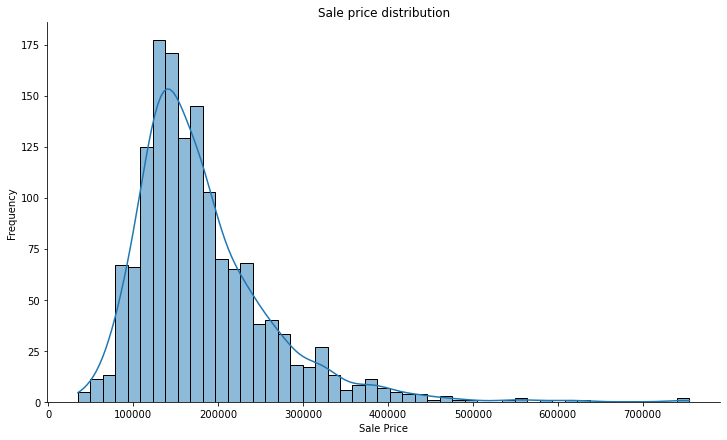

In [9]:
sns.displot(df_train['SalePrice'], kde=True, height=6, aspect=1.7)
plt.title('Sale price distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the previous graph, the outliers are clearly observed, so they must be clearly indentified. For this, the criteria used is the interquartile range $(IQR)$ defined by
\begin{equation}
IQR \equiv Q1-Q3
\end{equation}
Where $Q1$ is the first quartile and $Q3$ is the third quartile. Therefore, the outlires are considered as values that are outside the range
\begin{equation}\tag{2}
outliner \notin [Q1 -(1.5\cdot RIQ), Q3 +(1.5\cdot RIQ)]
\end{equation}
How many outliers do you have with this criteria?

In [13]:
def outlier(data, variable):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    ind_outliers = data[(data[variable] < lower) | (data[variable] > upper)][variable].index
    return ind_outliers


In [14]:
ind_outliers_SP = outlier(df_train, 'SalePrice')
print(len(ind_outliers_SP))

61


As there are only 61 outliers, it was decided to eliminate them, in order to have no noise in the prediction, so now we have the following disrtibution

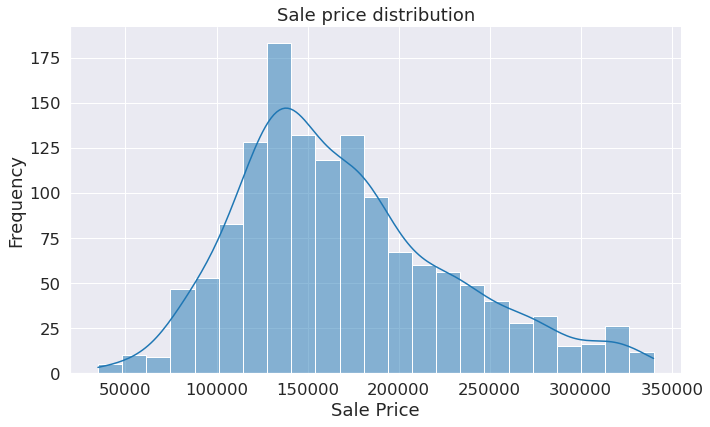

In [15]:
df_train_clean = df_train.drop(ind_outliers_SP)
sns.displot(data=df_train_clean, x='SalePrice', kde=True, height=6, aspect=1.7)
plt.title('Sale price distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
df_train_clean['SalePrice'].describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

Now is interesting to know the relationship between the numerical variables, for this the Pearson correlation coefficient over a sample $\lbrace(x_i,y_i)\rbrace_{y=1}^N$ was used, which is defined as
\begin{equation}\tag{3}
r_{xy}=\dfrac{\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^N(y_i-\bar{y})^2}}
\end{equation}
Where $\bar{x}, \bar{y}$ are the averages of the variables $x$ & $y$ respecrively and $N$ is the number of elements.

The correlation matriz was calculated, this matrix shows the Pearson correlation coefficient between all numerical variables of the datases and for a better visualization it is show in a heat map

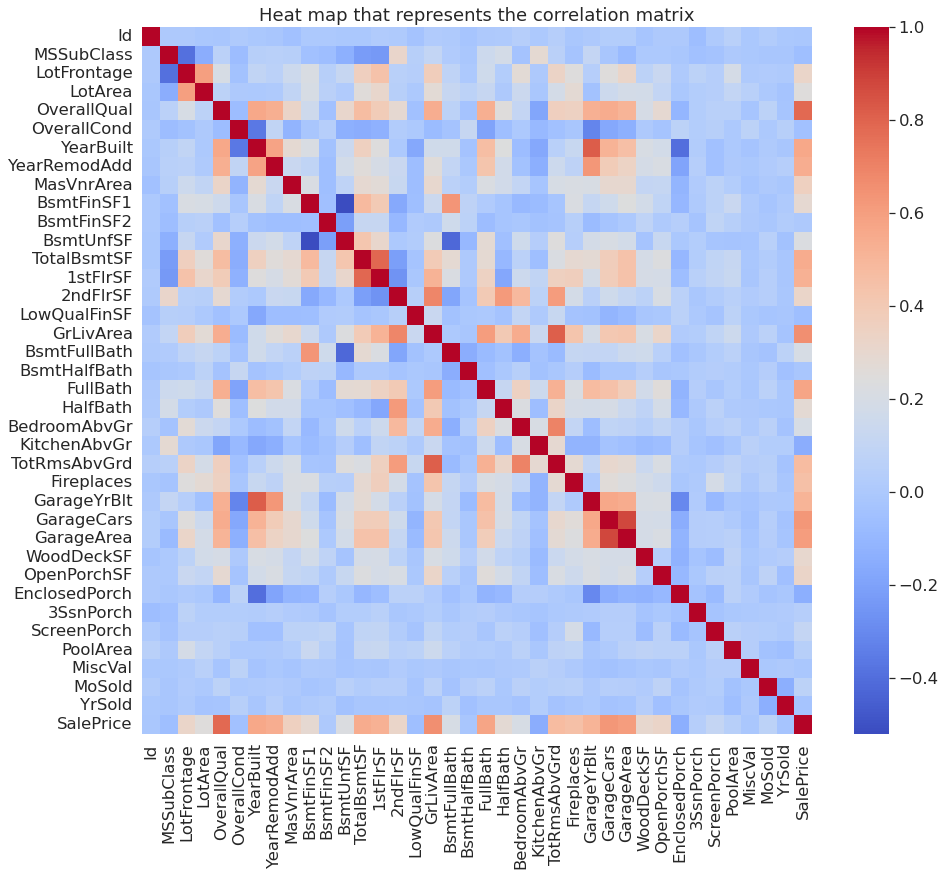

In [17]:
corr_matrix = df_train_clean.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True);
plt.title('Heat map that represents the correlation matrix')
plt.show()

In particular in this analysis the interest is in the variable SalePrice, so let's first see the 10 minor correlations to see if there's a negative correlation

In [17]:
df_min_corr = pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=True)[0:10])
df_min_corr

,SalePrice
KitchenAbvGr,-0.147385
EnclosedPorch,-0.144996
MSSubClass,-0.060111
LowQualFinSF,-0.058086
OverallCond,-0.048005
YrSold,-0.028245
BsmtHalfBath,-0.018827
MiscVal,-0.012872
Id,-0.011984
BsmtFinSF2,0.007154


Now let's see the 10 highest correlations 

In [18]:
df_max_corr = pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=False)[0:10])
df_max_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.784294
GrLivArea,0.661325
GarageCars,0.628013
GarageArea,0.607230
FullBath,0.577369
YearBuilt,0.564558
TotalBsmtSF,0.543508
YearRemodAdd,0.541161
1stFlrSF,0.522785


As show un $(3)$, ther is a perfect correlation at -1 or 1, so let's notice that the 10 lowest correlation with SalePrice aren't close to -1, so these variables are not realeted with SalePrice. On the other hand, the 10 highest correlations are closed to 1. Therefore let's see how these variables are disributed

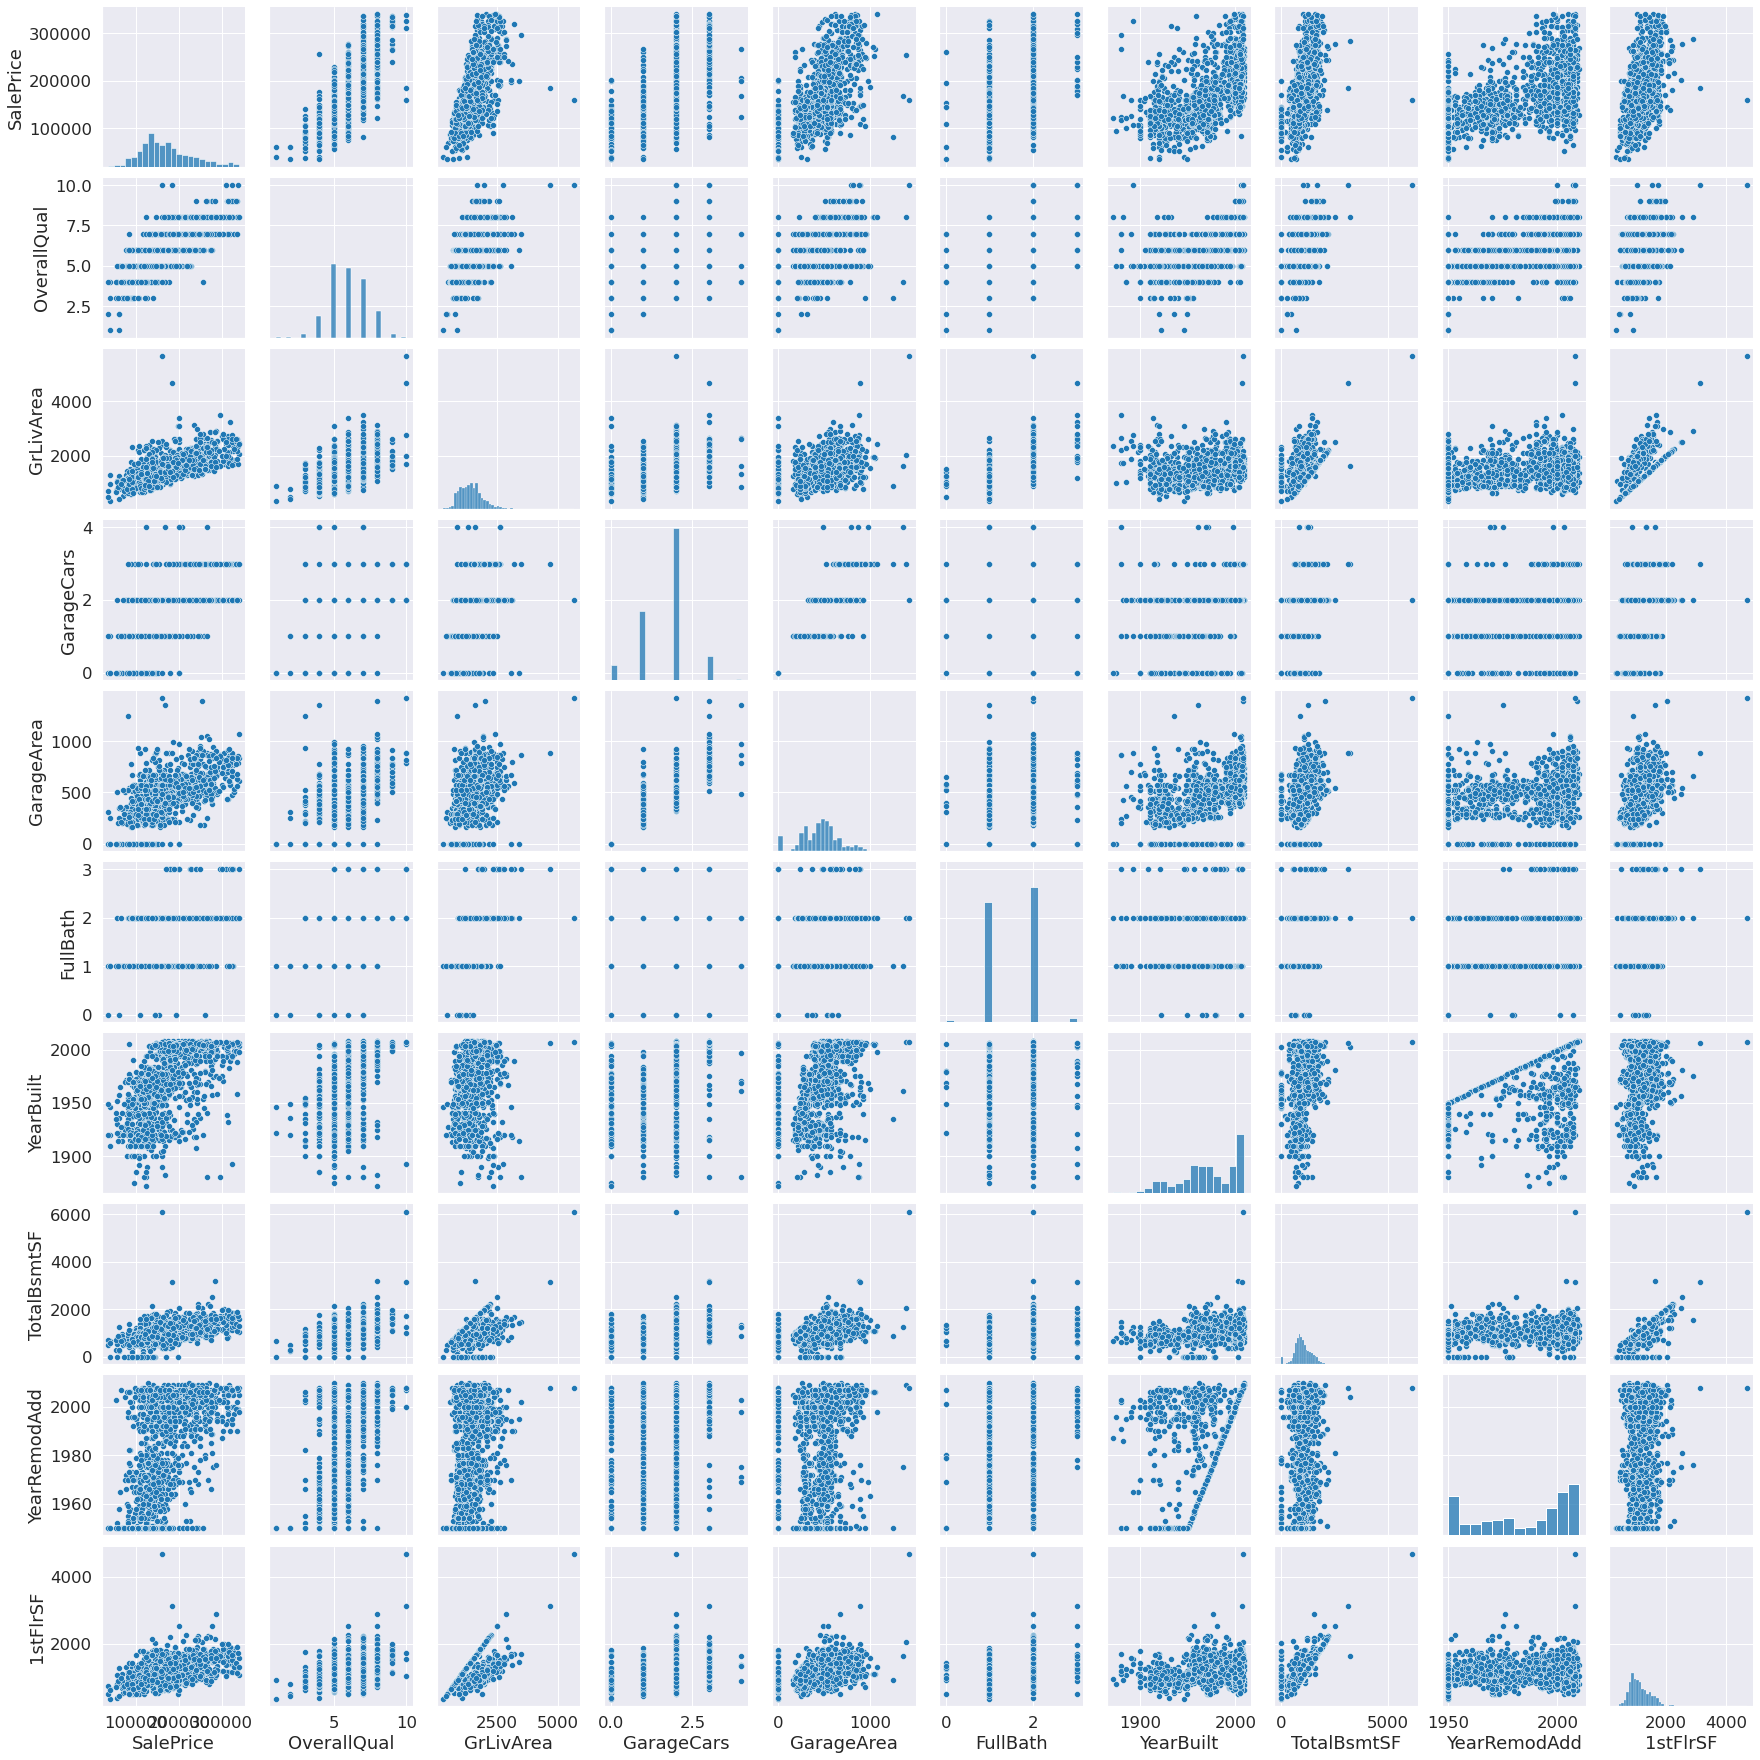

In [19]:
features = list(corr_matrix['SalePrice'].sort_values(ascending=False)[0:10].index)
sns.pairplot(df_train_clean[features])
plt.show()

## 4. Data Cleaning

The variable with highest correlation with SalePrice is OverallQual, this varible rates the overall material and finish of the house, being
- 10 $\to$ Very Excellent 
- 9 $\to$ Excellent
- 8 $\to$ Very Good
- 7 $\to$ Good
- 6 $\to$ Above Average
- 5 $\to$ Average
- 4 $\to$ Below Average
- 3 $\to$ Fair
- 2 $\to$ Poor
- 1 $\to$ Very Poor

The second variable with highest correlation is GrLivArea, this variable represents the above grade (ground) living area square feet

And the third variable with highest correlation is GarageCars, this variable representes the size of garage in car capacity

These variables are the ones used in the analysis, so we have to check if ther have null values

In [20]:
df_train_num_null = pd.DataFrame(df_train_clean[['OverallQual','GrLivArea','GarageCars']].isnull().sum(), columns=['Num-Nulos'])
df_train_num_null

,Num-Nulos
OverallQual,0
GrLivArea,0
GarageCars,0


In order to observe the OverallQual outliers, a box plot was created

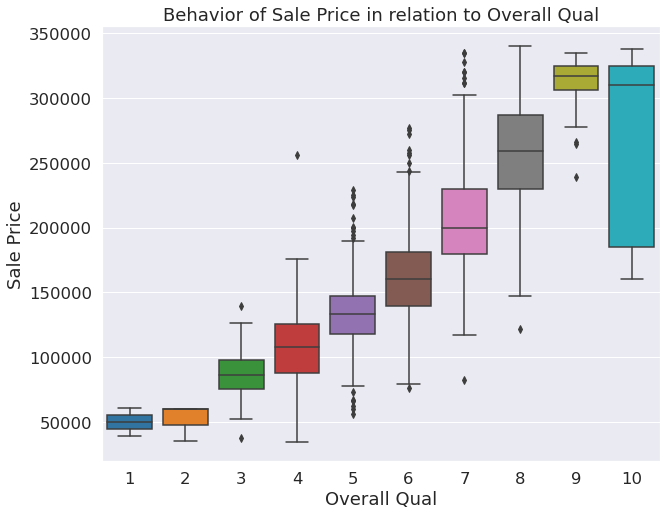

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train_clean, x='OverallQual', y='SalePrice')
plt.xlabel('Overall Qual')
plt.ylabel('Sale Price')
plt.title('Behavior of Sale Price in relation to Overall Qual')
plt.show()

From the previous graph, the existence of outliers is clearly observed, so the IQR criterion was used in the same way to identify and eliminate them

In [28]:
def outliers_dummie(data, variable, num):
    df = data[data[variable] == num]
    q1 = df['SalePrice'].quantile(0.25)
    q3 = df['SalePrice'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    ind = list(df[(df['SalePrice'] < lower) | (df['SalePrice'] > upper)].index)
    return ind 

In [29]:
for i in range(1,11):
    ind = outliers_dummie(df_train_clean, 'OverallQual', i)
    df_train_clean = df_train_clean.drop(ind)

In order to observe the outliers of GrLivArea, a scatter plot was creates

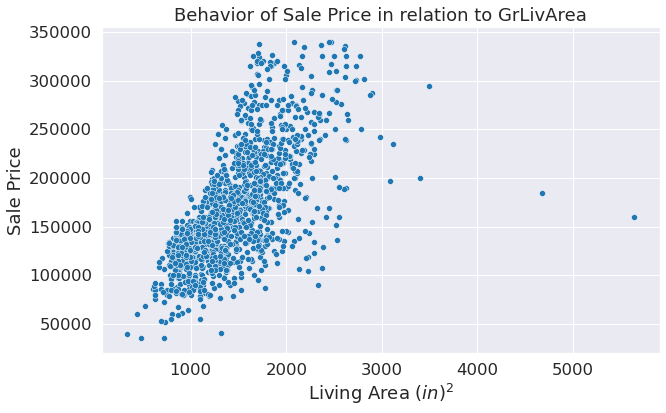

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train_clean, x='GrLivArea',y='SalePrice')
plt.ylabel('Sale Price')
plt.xlabel('Living Area $(in)^2$')
plt.title('Behavior of Sale Price in relation to GrLivArea')
plt.show()

As outliers are presented, so the IQR criteria was used in the same way to identify and eliminate them. So now we have

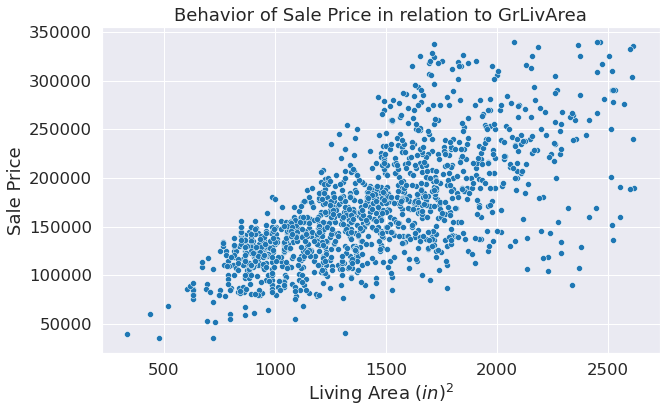

In [31]:
ind_outlier_GLA = outlier(df_train_clean,'GrLivArea')
df_train_clean = df_train_clean.drop(ind_outlier_GLA)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train_clean, x='GrLivArea', y='SalePrice')
plt.ylabel('Sale Price')
plt.xlabel('Living Area $(in)^2$')
plt.title('Behavior of Sale Price in relation to GrLivArea')
plt.show()

In order to observe the GarageCars outliers, a box plot was created

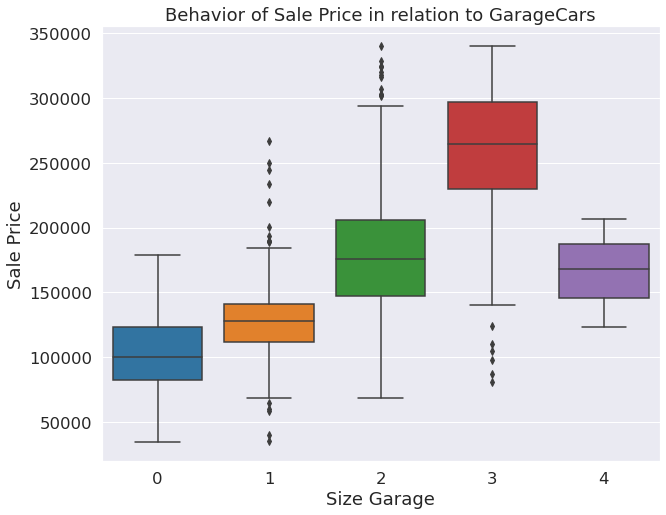

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train_clean, x='GarageCars', y='SalePrice')
plt.xlabel('Size Garage')
plt.ylabel('Sale Price')
plt.title('Behavior of Sale Price in relation to GarageCars')
plt.show()

From the previous graph the existence of outliers is clearly observed, so the IQR criteria was used in the same way to identify and eliminate

In [33]:
for i in range(0,5):
    ind = outliers_dummie(df_train_clean, 'GarageCars', i)
    df_train_clean = df_train_clean.drop(ind)

So now, what is the shape of the data frame?

In [34]:
df_train_clean.shape

(1305, 81)

In order to correctly use OverallQual and GarageCaras variables in linear regression, it's necessary to separate these variables into a binary variables

In [35]:
df_train_clean = pd.get_dummies(df_train_clean, columns=['OverallQual','GarageCars'])
df_train_clean.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

Therefore we have the columns (OverallQual_1, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_8, OverallQual_9, OverallQual_10, GarageCars_0, GarageCars_1, GarageCars_2, GarageCars_3, GarageCars_4).

## 5. Model

To make the prediction, the linear regression model was used with the dummies variables of OverallQual and GrLivArea, and the GrLivArea variable, so the model was created and trained

In [37]:
from sklearn.linear_model import LinearRegression

features = ['OverallQual_1', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'GarageCars_0', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'GrLivArea']
x_train =  df_train_clean[features].values
y_train = df_train_clean['SalePrice'].values

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

Therefore we get the function
\begin{equation}\tag{4}
f(x_1,x_2,\dots,x_{15})=\sum_{i=1}^{15}\alpha_ix_i=\alpha_1x_1+\alpha_2x_2+\cdots+\alpha_{15}x_{15}
\end{equation}
Where $x_i$ is the value of OverrQual_i with $i=1,\dots,10$, $x_i$ is the value of GarageCars_i with $i=11,\dots,14$, $x_15$ is the value of GrLivArea and $\alpha_i$  constant $\forall i = 1,\cdots,15$.


## 6. Prediction

Fisrt we have to check if there are null values of OverallQual, GrLivArea and GarageCars in the test data set

In [36]:
df_pred_null = pd.DataFrame(df_test[['OverallQual','GrLivArea','GarageCars']].isnull().sum(), columns=['Num-Nulos'])
df_pred_null

,Num-Nulos
OverallQual,0
GrLivArea,0
GarageCars,1


Since there is a null values in GarageCars in the test data set, therefore this values was changed to the averege value

In [38]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(round(df_test['GarageCars'].mean())) 

Now using the previous function we can make the prediction of the sale prices in the test dataset. First we have to create the binary variables of the variables OverallQual and CarageCars in the test data and with this the prediction was made

In [39]:
df_pred = pd.get_dummies(df_test, columns=['OverallQual','GarageCars'])
df_pred.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

In [40]:
test_features =  ['OverallQual_1',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'GarageCars_0.0', 'GarageCars_1.0', 'GarageCars_2.0',
       'GarageCars_3.0', 'GarageCars_4.0', 'GrLivArea']

x_test = df_pred[test_features].values

y_pred = reg.predict(x_test)

## 7. Evaluation

For the evaluation of the model it is necessary to send the obtained results to Kaggle since only the platform knows the SalePrice values of the tes data set and evaluets them with the Root Mean Squared Error ($RMSE$)
\begin{equation}\tag{5}
RMSE=\sqrt{\dfrac{\sum_{i=1}^N(\widehat{y_i}-y_i)^2}{N}}
\end{equation}
Where $N$ is the number of elements,$\widehat{y_i}$ is the predicted value and $y_i$ is the actual value. Therefore te prediction is better when RMSE is closer to 0

To send the values to Kaggle we have to prepare the data aas requested by the platform

In [41]:
output = pd.DataFrame({'Id': df_pred.Id, 'SalePrice': y_pred})
output
output.to_csv('pred.csv', index=False)

When sending the csv file to Kaggle the following result are obtained 

![](eval.png)